In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Lets clean matches data first.

In [243]:
df_matches = pd.read_csv('matches.csv')
df_matches.head()

,season,team1,team2,date,match_number,venue,city,toss_winner,toss_decision,player_of_match,umpire1,umpire2,reserve_umpire,match_referee,winner,winner_runs,winner_wickets,match_type
0,2024,Canada,United States of America,2024/06/01,1,Grand Prairie Stadium,Dallas,United States of America,field,Aaron Jones,RK Illingworth,Sharfuddoula,L Rusere,RB Richardson,United States of America,NaN,7.0,Group
1,2024,Papua New Guinea,West Indies,2024/06/02,2,Providence Stadium,Providence,West Indies,field,RL Chase,AT Holdstock,Rashid Riaz,HDPK Dharmasena,AJ Pycroft,West Indies,NaN,5.0,Group
2,2024,Oman,Namibia,2024/06/02,3,Kensington Oval,Bridgetown,Namibia,field,D Wiese,J Madanagopal,JS Wilson,Asif Yaqoob,RS Madugalle,NaN,NaN,NaN,Group
3,2024,Sri Lanka,South Africa,2024/06/03,4,Nassau County International Cricket Stadium,New York,Sri Lanka,bat,A Nortje,CM Brown,RA Kettleborough,AG Wharf,JJ Crowe,South Africa,NaN,6.0,Group
4,2024,Afghanistan,Uganda,2024/06/03,5,Providence Stadium,Providence,Uganda,field,Fazalhaq Farooqi,Ahsan Raza,HDPK Dharmasena,Rashid Riaz,AJ Pycroft,Afghanistan,125.0,NaN,Group


In [244]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           52 non-null     int64  
 1   team1            52 non-null     object 
 2   team2            52 non-null     object 
 3   date             52 non-null     object 
 4   match_number     52 non-null     int64  
 5   venue            52 non-null     object 
 6   city             52 non-null     object 
 7   toss_winner      52 non-null     object 
 8   toss_decision    52 non-null     object 
 9   player_of_match  51 non-null     object 
 10  umpire1          52 non-null     object 
 11  umpire2          52 non-null     object 
 12  reserve_umpire   52 non-null     object 
 13  match_referee    52 non-null     object 
 14  winner           50 non-null     object 
 15  winner_runs      25 non-null     float64
 16  winner_wickets   24 non-null     float64
 17  match_type       5

In [245]:
df_matches.describe()

,season,match_number,winner_runs,winner_wickets
count,52.0,52.000000,25.000000,24.000000
mean,2024.0,27.961538,40.240000,6.416667
std,0.0,16.453096,38.411457,2.244155
min,2024.0,1.000000,1.000000,2.000000
25%,2024.0,13.750000,12.000000,5.000000
50%,2024.0,27.500000,25.000000,7.000000
75%,2024.0,42.250000,50.000000,8.000000
max,2024.0,55.000000,134.000000,10.000000


In [246]:
df_matches.isnull().sum()

season              0
team1               0
team2               0
date                0
match_number        0
venue               0
city                0
toss_winner         0
toss_decision       0
player_of_match     1
umpire1             0
umpire2             0
reserve_umpire      0
match_referee       0
winner              2
winner_runs        27
winner_wickets     28
match_type          0
dtype: int64

In [247]:
df_matches.duplicated().sum()
df_matches.shape

(52, 18)

In [248]:
df_matches.head()


,season,team1,team2,date,match_number,venue,city,toss_winner,toss_decision,player_of_match,umpire1,umpire2,reserve_umpire,match_referee,winner,winner_runs,winner_wickets,match_type
0,2024,Canada,United States of America,2024/06/01,1,Grand Prairie Stadium,Dallas,United States of America,field,Aaron Jones,RK Illingworth,Sharfuddoula,L Rusere,RB Richardson,United States of America,NaN,7.0,Group
1,2024,Papua New Guinea,West Indies,2024/06/02,2,Providence Stadium,Providence,West Indies,field,RL Chase,AT Holdstock,Rashid Riaz,HDPK Dharmasena,AJ Pycroft,West Indies,NaN,5.0,Group
2,2024,Oman,Namibia,2024/06/02,3,Kensington Oval,Bridgetown,Namibia,field,D Wiese,J Madanagopal,JS Wilson,Asif Yaqoob,RS Madugalle,NaN,NaN,NaN,Group
3,2024,Sri Lanka,South Africa,2024/06/03,4,Nassau County International Cricket Stadium,New York,Sri Lanka,bat,A Nortje,CM Brown,RA Kettleborough,AG Wharf,JJ Crowe,South Africa,NaN,6.0,Group
4,2024,Afghanistan,Uganda,2024/06/03,5,Providence Stadium,Providence,Uganda,field,Fazalhaq Farooqi,Ahsan Raza,HDPK Dharmasena,Rashid Riaz,AJ Pycroft,Afghanistan,125.0,NaN,Group


In [249]:
df_matches_copy = df_matches.copy()


In [250]:
df_matches_copy.head()

,season,team1,team2,date,match_number,venue,city,toss_winner,toss_decision,player_of_match,umpire1,umpire2,reserve_umpire,match_referee,winner,winner_runs,winner_wickets,match_type
0,2024,Canada,United States of America,2024/06/01,1,Grand Prairie Stadium,Dallas,United States of America,field,Aaron Jones,RK Illingworth,Sharfuddoula,L Rusere,RB Richardson,United States of America,NaN,7.0,Group
1,2024,Papua New Guinea,West Indies,2024/06/02,2,Providence Stadium,Providence,West Indies,field,RL Chase,AT Holdstock,Rashid Riaz,HDPK Dharmasena,AJ Pycroft,West Indies,NaN,5.0,Group
2,2024,Oman,Namibia,2024/06/02,3,Kensington Oval,Bridgetown,Namibia,field,D Wiese,J Madanagopal,JS Wilson,Asif Yaqoob,RS Madugalle,NaN,NaN,NaN,Group
3,2024,Sri Lanka,South Africa,2024/06/03,4,Nassau County International Cricket Stadium,New York,Sri Lanka,bat,A Nortje,CM Brown,RA Kettleborough,AG Wharf,JJ Crowe,South Africa,NaN,6.0,Group
4,2024,Afghanistan,Uganda,2024/06/03,5,Providence Stadium,Providence,Uganda,field,Fazalhaq Farooqi,Ahsan Raza,HDPK Dharmasena,Rashid Riaz,AJ Pycroft,Afghanistan,125.0,NaN,Group


In [251]:
df_matches_copy[df_matches_copy['player_of_match'].isnull()]

,season,team1,team2,date,match_number,venue,city,toss_winner,toss_decision,player_of_match,umpire1,umpire2,reserve_umpire,match_referee,winner,winner_runs,winner_wickets,match_type
5,2024,Scotland,England,2024/06/04,6,Kensington Oval,Bridgetown,Scotland,bat,NaN,Asif Yaqoob,Nitin Menon,J Madanagopal,RS Madugalle,No Result,NaN,NaN,Group


In [252]:

df_matches_copy.shape
df_matches_copy.head()

,season,team1,team2,date,match_number,venue,city,toss_winner,toss_decision,player_of_match,umpire1,umpire2,reserve_umpire,match_referee,winner,winner_runs,winner_wickets,match_type
0,2024,Canada,United States of America,2024/06/01,1,Grand Prairie Stadium,Dallas,United States of America,field,Aaron Jones,RK Illingworth,Sharfuddoula,L Rusere,RB Richardson,United States of America,NaN,7.0,Group
1,2024,Papua New Guinea,West Indies,2024/06/02,2,Providence Stadium,Providence,West Indies,field,RL Chase,AT Holdstock,Rashid Riaz,HDPK Dharmasena,AJ Pycroft,West Indies,NaN,5.0,Group
2,2024,Oman,Namibia,2024/06/02,3,Kensington Oval,Bridgetown,Namibia,field,D Wiese,J Madanagopal,JS Wilson,Asif Yaqoob,RS Madugalle,NaN,NaN,NaN,Group
3,2024,Sri Lanka,South Africa,2024/06/03,4,Nassau County International Cricket Stadium,New York,Sri Lanka,bat,A Nortje,CM Brown,RA Kettleborough,AG Wharf,JJ Crowe,South Africa,NaN,6.0,Group
4,2024,Afghanistan,Uganda,2024/06/03,5,Providence Stadium,Providence,Uganda,field,Fazalhaq Farooqi,Ahsan Raza,HDPK Dharmasena,Rashid Riaz,AJ Pycroft,Afghanistan,125.0,NaN,Group


In [253]:
df_matches_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           52 non-null     int64  
 1   team1            52 non-null     object 
 2   team2            52 non-null     object 
 3   date             52 non-null     object 
 4   match_number     52 non-null     int64  
 5   venue            52 non-null     object 
 6   city             52 non-null     object 
 7   toss_winner      52 non-null     object 
 8   toss_decision    52 non-null     object 
 9   player_of_match  51 non-null     object 
 10  umpire1          52 non-null     object 
 11  umpire2          52 non-null     object 
 12  reserve_umpire   52 non-null     object 
 13  match_referee    52 non-null     object 
 14  winner           50 non-null     object 
 15  winner_runs      25 non-null     float64
 16  winner_wickets   24 non-null     float64
 17  match_type       5

In [254]:
#remove no result matches
df_matches_copy = df_matches_copy.dropna(subset=['player_of_match'])

In [255]:
df_matches_copy.shape

(51, 18)

In [256]:
df_matches_copy['season'].unique()
#this is not a important column so we can drop
df_matches_copy = df_matches_copy.drop('season',axis=1)
df_matches_copy.head()

,team1,team2,date,match_number,venue,city,toss_winner,toss_decision,player_of_match,umpire1,umpire2,reserve_umpire,match_referee,winner,winner_runs,winner_wickets,match_type
0,Canada,United States of America,2024/06/01,1,Grand Prairie Stadium,Dallas,United States of America,field,Aaron Jones,RK Illingworth,Sharfuddoula,L Rusere,RB Richardson,United States of America,NaN,7.0,Group
1,Papua New Guinea,West Indies,2024/06/02,2,Providence Stadium,Providence,West Indies,field,RL Chase,AT Holdstock,Rashid Riaz,HDPK Dharmasena,AJ Pycroft,West Indies,NaN,5.0,Group
2,Oman,Namibia,2024/06/02,3,Kensington Oval,Bridgetown,Namibia,field,D Wiese,J Madanagopal,JS Wilson,Asif Yaqoob,RS Madugalle,NaN,NaN,NaN,Group
3,Sri Lanka,South Africa,2024/06/03,4,Nassau County International Cricket Stadium,New York,Sri Lanka,bat,A Nortje,CM Brown,RA Kettleborough,AG Wharf,JJ Crowe,South Africa,NaN,6.0,Group
4,Afghanistan,Uganda,2024/06/03,5,Providence Stadium,Providence,Uganda,field,Fazalhaq Farooqi,Ahsan Raza,HDPK Dharmasena,Rashid Riaz,AJ Pycroft,Afghanistan,125.0,NaN,Group


In [257]:
df_matches_copy['team1'].unique()

array(['Canada', 'Papua New Guinea', 'Oman', 'Sri Lanka', 'Afghanistan',
       'Nepal', 'Ireland', 'Australia', 'Pakistan', 'Namibia',
       'Netherlands', 'West Indies', 'India', 'South Africa',
       'United States of America', 'Bangladesh', 'Uganda', 'England',
       'Scotland'], dtype=object)

In [258]:
df_matches_copy['team2'].unique()

array(['United States of America', 'West Indies', 'Namibia',
       'South Africa', 'Uganda', 'Netherlands', 'India', 'Oman',
       'Scotland', 'Ireland', 'New Zealand', 'Bangladesh', 'England',
       'Pakistan', 'Australia', 'Afghanistan', 'Nepal'], dtype=object)

In [259]:
df_matches_copy['date'].unique()

array(['2024/06/01', '2024/06/02', '2024/06/03', '2024/06/04',
       '2024/06/05', '2024/06/06', '2024/06/07', '2024/06/08',
       '2024/06/09', '2024/06/10', '2024/06/11', '2024/06/12',
       '2024/06/13', '2024/06/14', '2024/06/15', '2024/06/16',
       '2024/06/17', '2024/06/19', '2024/06/20', '2024/06/21',
       '2024/06/22', '2024/06/23', '2024/06/24', '2024/06/26',
       '2024/06/27', '2024/06/29'], dtype=object)

In [260]:
#we can convert date to integer
df_matches_copy['date'] = pd.to_datetime(df_matches_copy['date'], format='%Y/%m/%d')
df_matches_copy['match_day'] = df_matches_copy['date'].dt.day
df_matches_copy['match_month'] = df_matches_copy['date'].dt.month
df_matches_copy['match_year'] = df_matches_copy['date'].dt.year
df_matches_copy.drop('date',inplace=True,axis=1)
df_matches_copy.head()

,team1,team2,match_number,venue,city,toss_winner,toss_decision,player_of_match,umpire1,umpire2,reserve_umpire,match_referee,winner,winner_runs,winner_wickets,match_type,match_day,match_month,match_year
0,Canada,United States of America,1,Grand Prairie Stadium,Dallas,United States of America,field,Aaron Jones,RK Illingworth,Sharfuddoula,L Rusere,RB Richardson,United States of America,NaN,7.0,Group,1,6,2024
1,Papua New Guinea,West Indies,2,Providence Stadium,Providence,West Indies,field,RL Chase,AT Holdstock,Rashid Riaz,HDPK Dharmasena,AJ Pycroft,West Indies,NaN,5.0,Group,2,6,2024
2,Oman,Namibia,3,Kensington Oval,Bridgetown,Namibia,field,D Wiese,J Madanagopal,JS Wilson,Asif Yaqoob,RS Madugalle,NaN,NaN,NaN,Group,2,6,2024
3,Sri Lanka,South Africa,4,Nassau County International Cricket Stadium,New York,Sri Lanka,bat,A Nortje,CM Brown,RA Kettleborough,AG Wharf,JJ Crowe,South Africa,NaN,6.0,Group,3,6,2024
4,Afghanistan,Uganda,5,Providence Stadium,Providence,Uganda,field,Fazalhaq Farooqi,Ahsan Raza,HDPK Dharmasena,Rashid Riaz,AJ Pycroft,Afghanistan,125.0,NaN,Group,3,6,2024


In [261]:
df_matches_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, 0 to 51
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   team1            51 non-null     object 
 1   team2            51 non-null     object 
 2   match_number     51 non-null     int64  
 3   venue            51 non-null     object 
 4   city             51 non-null     object 
 5   toss_winner      51 non-null     object 
 6   toss_decision    51 non-null     object 
 7   player_of_match  51 non-null     object 
 8   umpire1          51 non-null     object 
 9   umpire2          51 non-null     object 
 10  reserve_umpire   51 non-null     object 
 11  match_referee    51 non-null     object 
 12  winner           49 non-null     object 
 13  winner_runs      25 non-null     float64
 14  winner_wickets   24 non-null     float64
 15  match_type       51 non-null     object 
 16  match_day        51 non-null     int32  
 17  match_month      51 non

In [262]:
df_matches_copy['match_number'].unique()

array([ 1,  2,  3,  4,  5,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 31, 32, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55])

In [263]:
df_matches_copy['venue'].unique()

array(['Grand Prairie Stadium', 'Providence Stadium', 'Kensington Oval',
       'Nassau County International Cricket Stadium',
       'Sir Vivian Richards Stadium', 'Brian Lara Stadium',
       'Arnos Vale Ground', 'Daren Sammy National Cricket Stadium',
       'Central Broward Regional Park Stadium Turf Ground'], dtype=object)

In [264]:
df_matches_copy['city'].unique()

array(['Dallas', 'Providence', 'Bridgetown', 'New York', 'North Sound',
       'Tarouba', 'Kingstown', 'Gros Islet', 'Lauderhill'], dtype=object)

In [265]:
df_matches_copy['toss_winner'].unique()

array(['United States of America', 'West Indies', 'Namibia', 'Sri Lanka',
       'Uganda', 'Netherlands', 'India', 'Oman', 'Ireland', 'New Zealand',
       'Bangladesh', 'South Africa', 'England', 'Pakistan', 'Australia',
       'Afghanistan', 'Nepal'], dtype=object)

In [266]:
df_matches_copy['toss_decision'].unique()

array(['field', 'bat'], dtype=object)

In [267]:
df_matches_copy['umpire1'].unique()

array(['RK Illingworth', 'AT Holdstock', 'J Madanagopal', 'CM Brown',
       'Ahsan Raza', 'L Rusere', 'AG Wharf', 'Asif Yaqoob', 'A Paleker',
       'RA Kettleborough', 'MA Gough', 'CB Gaffaney', 'JS Wilson',
       'HDPK Dharmasena', 'Nitin Menon', 'PR Reiffel'], dtype=object)

In [268]:
df_matches_copy['umpire2'].unique()

array(['Sharfuddoula', 'Rashid Riaz', 'JS Wilson', 'RA Kettleborough',
       'HDPK Dharmasena', 'RJ Tucker', 'CB Gaffaney', 'MA Gough',
       'Nitin Menon', 'SJ Nogajski', 'PR Reiffel', 'CM Brown', 'AG Wharf',
       'J Madanagopal', 'L Rusere', 'RK Illingworth', 'A Paleker'],
      dtype=object)

In [269]:
df_matches_copy['match_referee'].unique()

array(['RB Richardson', 'AJ Pycroft', 'RS Madugalle', 'JJ Crowe',
       'DC Boon', 'J Srinath'], dtype=object)

In [270]:
df_matches_copy.drop(columns = ['umpire1', 'umpire2', 'reserve_umpire','match_referee'], axis=1, inplace=True)

In [271]:
df_matches_copy['winner'].unique()

array(['United States of America', 'West Indies', nan, 'South Africa',
       'Afghanistan', 'Netherlands', 'India', 'Uganda', 'Australia',
       'Scotland', 'Canada', 'Bangladesh', 'Pakistan', 'England',
       'New Zealand', 'Sri Lanka'], dtype=object)

In [272]:
#check for null values
df_matches_copy[df_matches_copy['winner'].isnull()]

,team1,team2,match_number,venue,city,toss_winner,toss_decision,player_of_match,winner,winner_runs,winner_wickets,match_type,match_day,match_month,match_year
2,Oman,Namibia,3,Kensington Oval,Bridgetown,Namibia,field,D Wiese,NaN,NaN,NaN,Group,2,6,2024
10,Pakistan,United States of America,11,Grand Prairie Stadium,Dallas,United States of America,field,MD Patel,NaN,NaN,NaN,Group,6,6,2024


In [273]:
df_matches_copy = df_matches_copy.dropna(subset=['winner'])
df_matches_copy.shape

(49, 15)

In [274]:
df_matches_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, 0 to 51
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   team1            49 non-null     object 
 1   team2            49 non-null     object 
 2   match_number     49 non-null     int64  
 3   venue            49 non-null     object 
 4   city             49 non-null     object 
 5   toss_winner      49 non-null     object 
 6   toss_decision    49 non-null     object 
 7   player_of_match  49 non-null     object 
 8   winner           49 non-null     object 
 9   winner_runs      25 non-null     float64
 10  winner_wickets   24 non-null     float64
 11  match_type       49 non-null     object 
 12  match_day        49 non-null     int32  
 13  match_month      49 non-null     int32  
 14  match_year       49 non-null     int32  
dtypes: float64(2), int32(3), int64(1), object(9)
memory usage: 5.6+ KB


In [275]:
df_matches_copy['match_type'].unique()

array(['Group', 'Semi Final', 'Final'], dtype=object)

In [276]:
df_matches_copy['match_type'].value_counts()

match_type
Group         46
Semi Final     2
Final          1
Name: count, dtype: int64

In [277]:
df_matches_copy[df_matches_copy['match_type'] == 'Final']

,team1,team2,match_number,venue,city,toss_winner,toss_decision,player_of_match,winner,winner_runs,winner_wickets,match_type,match_day,match_month,match_year
51,India,South Africa,55,Kensington Oval,Bridgetown,India,bat,V Kohli,India,7.0,NaN,Final,29,6,2024


In [278]:
df_matches_copy['winner_runs'] = df_matches_copy['winner_runs'].fillna(0)
df_matches_copy['winner_wickets'] = df_matches_copy['winner_wickets'].fillna(0)
df_matches_copy['winner_runs'].isnull().sum()
df_matches_copy['winner_wickets'].isnull().sum()

np.int64(0)

In [279]:
df_matches_copy['winner_wickets']= df_matches_copy['winner_wickets'].astype(int)
df_matches_copy['winner_runs'] = df_matches_copy['winner_runs'].astype(int)

In [280]:
df_matches_copy.to_csv('cleaneddata/cleaned_matches.csv',index=False)

In [281]:
df_matches_copy.head()

,team1,team2,match_number,venue,city,toss_winner,toss_decision,player_of_match,winner,winner_runs,winner_wickets,match_type,match_day,match_month,match_year
0,Canada,United States of America,1,Grand Prairie Stadium,Dallas,United States of America,field,Aaron Jones,United States of America,0,7,Group,1,6,2024
1,Papua New Guinea,West Indies,2,Providence Stadium,Providence,West Indies,field,RL Chase,West Indies,0,5,Group,2,6,2024
3,Sri Lanka,South Africa,4,Nassau County International Cricket Stadium,New York,Sri Lanka,bat,A Nortje,South Africa,0,6,Group,3,6,2024
4,Afghanistan,Uganda,5,Providence Stadium,Providence,Uganda,field,Fazalhaq Farooqi,Afghanistan,125,0,Group,3,6,2024
6,Nepal,Netherlands,7,Grand Prairie Stadium,Dallas,Netherlands,field,TJG Pringle,Netherlands,0,6,Group,4,6,2024


<Axes: xlabel='winner_runs', ylabel='Count'>

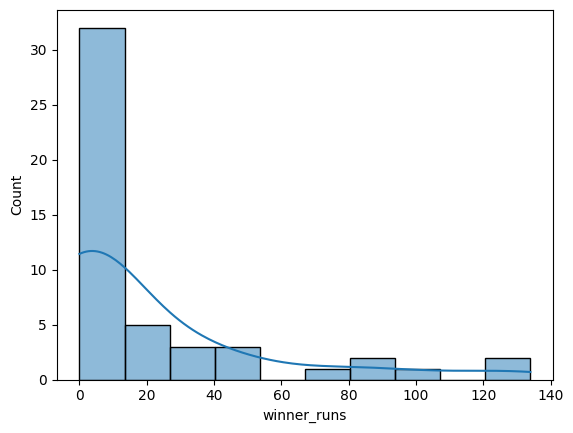

In [282]:
sns.histplot(df_matches_copy['winner_runs'],kde=True)

<Axes: xlabel='winner_wickets', ylabel='Count'>

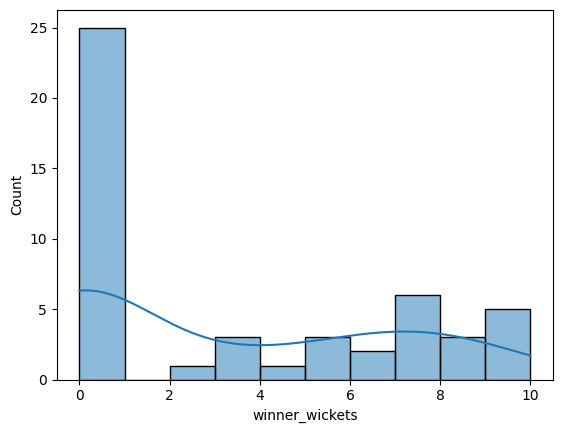

In [283]:
sns.histplot(df_matches_copy['winner_wickets'],kde=True,bins=10)

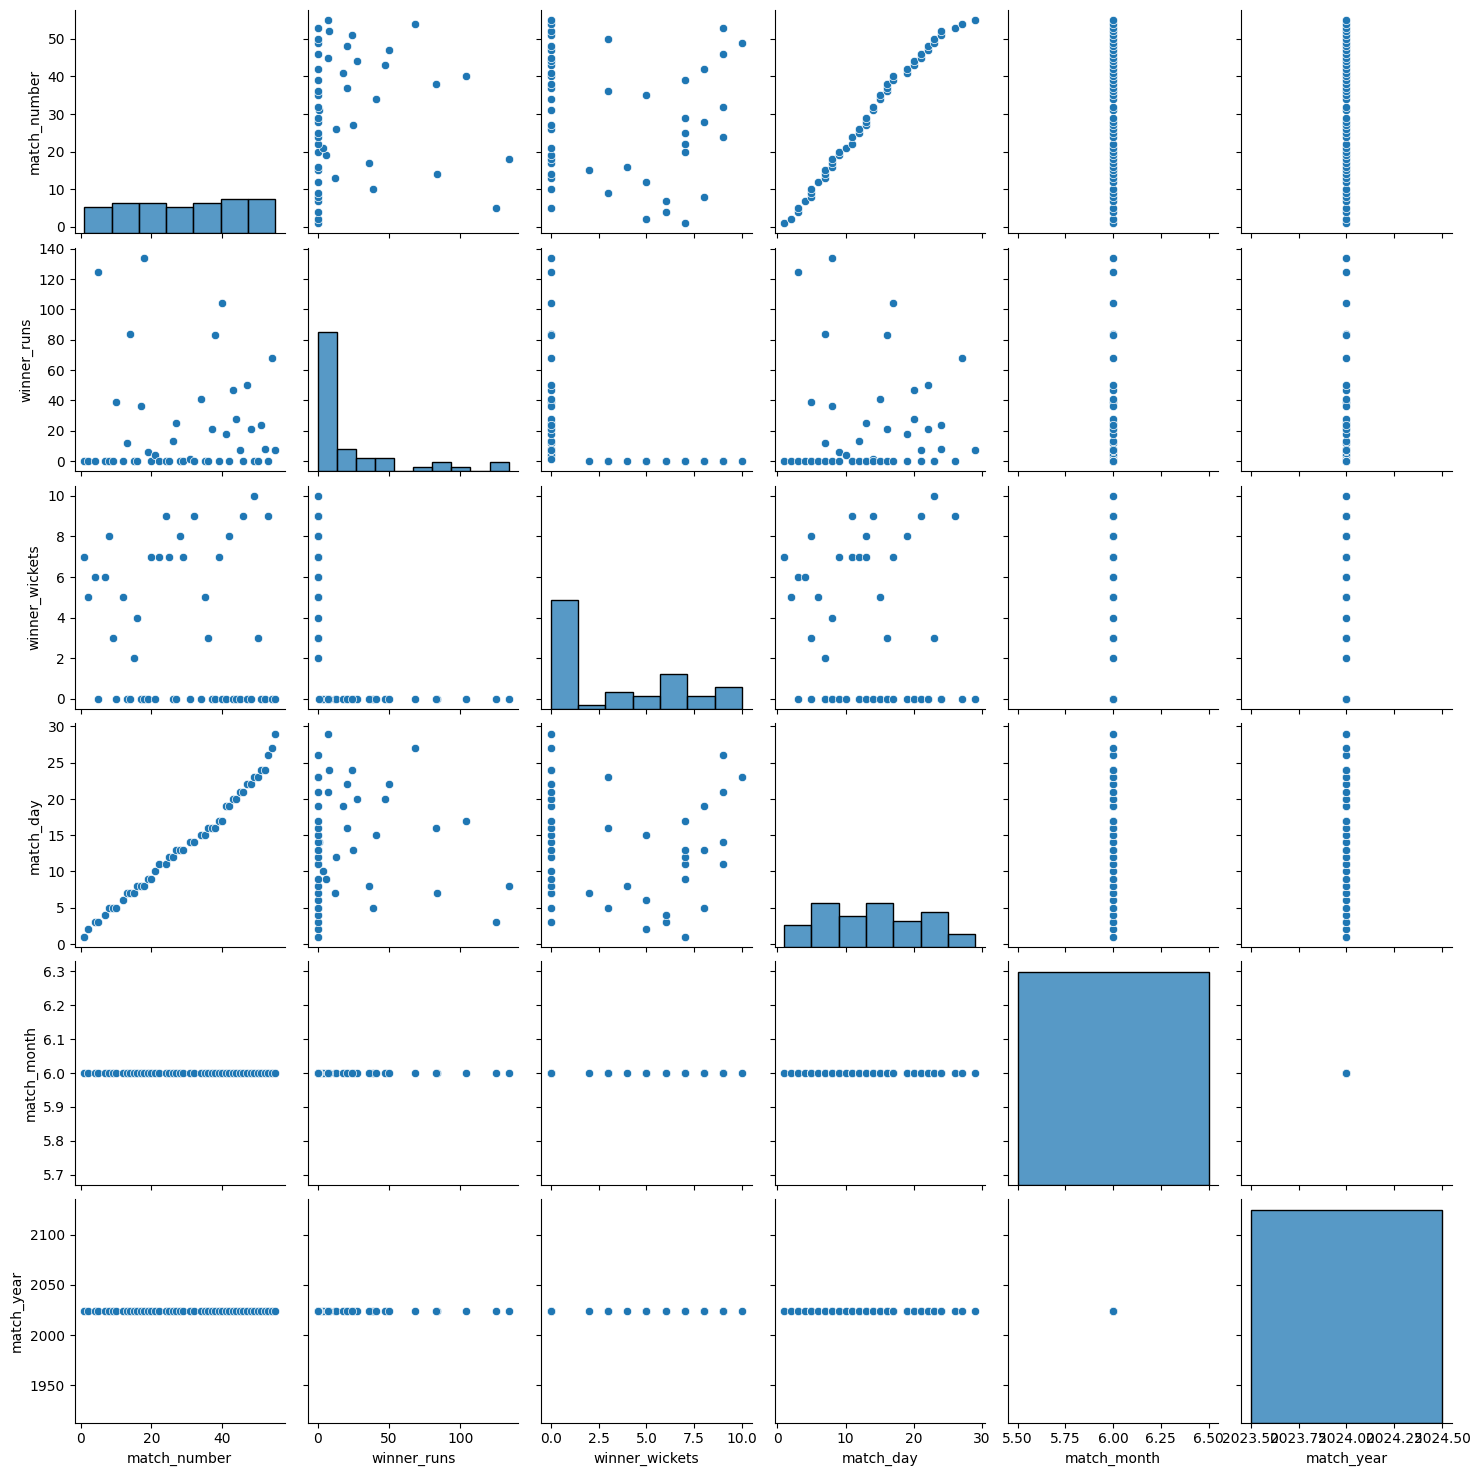

In [284]:
sns.pairplot(df_matches_copy)

In [285]:
df_matches_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, 0 to 51
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   team1            49 non-null     object
 1   team2            49 non-null     object
 2   match_number     49 non-null     int64 
 3   venue            49 non-null     object
 4   city             49 non-null     object
 5   toss_winner      49 non-null     object
 6   toss_decision    49 non-null     object
 7   player_of_match  49 non-null     object
 8   winner           49 non-null     object
 9   winner_runs      49 non-null     int64 
 10  winner_wickets   49 non-null     int64 
 11  match_type       49 non-null     object
 12  match_day        49 non-null     int32 
 13  match_month      49 non-null     int32 
 14  match_year       49 non-null     int32 
dtypes: int32(3), int64(3), object(9)
memory usage: 5.6+ KB


In [286]:
df_matches_copy['player_of_match'].mode()

0             A Zampa
1           AU Rashid
2    Fazalhaq Farooqi
3           JJ Bumrah
4          MP Stoinis
5           Q de Kock
6            RL Chase
7            T Shamsi
Name: player_of_match, dtype: object

In [287]:
df_matches_copy['player_of_match'].value_counts()

player_of_match
RL Chase               2
MP Stoinis             2
Fazalhaq Farooqi       2
JJ Bumrah              2
A Zampa                2
Q de Kock              2
AU Rashid              2
T Shamsi               2
Aaron Jones            1
MA Leask               1
Riazat Ali Shah        1
A Nortje               1
TJG Pringle            1
DA Miller              1
AJ Hosein              1
Rishad Hossain         1
NR Kirton              1
H Klaasen              1
BJ McMullen            1
Mohammad Amir          1
Arshdeep Singh         1
Shakib Al Hasan        1
SE Rutherford          1
TG Southee             1
Rahmanullah Gurbaz     1
HC Brook               1
Shaheen Shah Afridi    1
KIC Asalanka           1
Tanzim Hasan Sakib     1
LH Ferguson            1
N Pooran               1
PD Salt                1
SA Yadav               1
PJ Cummins             1
HH Pandya              1
Gulbadin Naib          1
RG Sharma              1
Naveen-ul-Haq          1
M Jansen               1
AR Patel 

In [288]:
df_deliveries = pd.read_csv('deliveries.csv')
df_deliveries.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,1,2024,2024-06-02,"Providence Stadium, Guyana",1,0.1,Papua New Guinea,West Indies,TP Ura,A Vala,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2024,2024-06-02,"Providence Stadium, Guyana",1,0.2,Papua New Guinea,West Indies,TP Ura,A Vala,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2024,2024-06-02,"Providence Stadium, Guyana",1,0.3,Papua New Guinea,West Indies,A Vala,TP Ura,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2024,2024-06-02,"Providence Stadium, Guyana",1,0.4,Papua New Guinea,West Indies,A Vala,TP Ura,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2024,2024-06-02,"Providence Stadium, Guyana",1,0.5,Papua New Guinea,West Indies,A Vala,TP Ura,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [289]:
df_deliveries.shape

(11472, 22)

In [290]:
df_deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11472 entries, 0 to 11471
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   match_id                11472 non-null  int64  
 1   season                  11472 non-null  int64  
 2   start_date              11472 non-null  object 
 3   venue                   11472 non-null  object 
 4   innings                 11472 non-null  int64  
 5   ball                    11472 non-null  float64
 6   batting_team            11472 non-null  object 
 7   bowling_team            11472 non-null  object 
 8   striker                 11472 non-null  object 
 9   non_striker             11472 non-null  object 
 10  bowler                  11472 non-null  object 
 11  runs_off_bat            11472 non-null  int64  
 12  extras                  11472 non-null  int64  
 13  wides                   408 non-null    float64
 14  noballs                 45 non-null   

In [291]:
df_deliveries_copy = df_deliveries.copy()
df_deliveries_copy.head()   

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,1,2024,2024-06-02,"Providence Stadium, Guyana",1,0.1,Papua New Guinea,West Indies,TP Ura,A Vala,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2024,2024-06-02,"Providence Stadium, Guyana",1,0.2,Papua New Guinea,West Indies,TP Ura,A Vala,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2024,2024-06-02,"Providence Stadium, Guyana",1,0.3,Papua New Guinea,West Indies,A Vala,TP Ura,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2024,2024-06-02,"Providence Stadium, Guyana",1,0.4,Papua New Guinea,West Indies,A Vala,TP Ura,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2024,2024-06-02,"Providence Stadium, Guyana",1,0.5,Papua New Guinea,West Indies,A Vala,TP Ura,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [292]:
df_deliveries_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11472 entries, 0 to 11471
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   match_id                11472 non-null  int64  
 1   season                  11472 non-null  int64  
 2   start_date              11472 non-null  object 
 3   venue                   11472 non-null  object 
 4   innings                 11472 non-null  int64  
 5   ball                    11472 non-null  float64
 6   batting_team            11472 non-null  object 
 7   bowling_team            11472 non-null  object 
 8   striker                 11472 non-null  object 
 9   non_striker             11472 non-null  object 
 10  bowler                  11472 non-null  object 
 11  runs_off_bat            11472 non-null  int64  
 12  extras                  11472 non-null  int64  
 13  wides                   408 non-null    float64
 14  noballs                 45 non-null   

In [293]:
df_deliveries_copy.describe()

,match_id,season,innings,ball,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,other_wicket_type,other_player_dismissed
count,11472.000000,11472.0,11472.000000,11472.000000,11472.000000,11472.000000,408.000000,45.0,41.000000,179.000000,1.0,0.0,0.0
mean,26.879794,2024.0,1.465394,9.108439,1.062413,0.076360,1.245098,1.0,2.073171,1.301676,5.0,NaN,NaN
std,16.343629,0.0,0.508687,5.612894,1.566343,0.375929,0.857816,0.0,1.311302,0.866705,NaN,NaN,NaN
min,0.000000,2024.0,1.000000,0.100000,0.000000,0.000000,1.000000,1.0,1.000000,1.000000,5.0,NaN,NaN
25%,12.000000,2024.0,1.000000,4.300000,0.000000,0.000000,1.000000,1.0,1.000000,1.000000,5.0,NaN,NaN
50%,26.000000,2024.0,1.000000,8.700000,1.000000,0.000000,1.000000,1.0,1.000000,1.000000,5.0,NaN,NaN
75%,42.000000,2024.0,2.000000,13.600000,1.000000,0.000000,1.000000,1.0,4.000000,1.000000,5.0,NaN,NaN
max,54.000000,2024.0,4.000000,19.800000,6.000000,5.000000,5.000000,1.0,4.000000,5.000000,5.0,NaN,NaN


In [294]:
df_matches_copy.describe()

,match_number,winner_runs,winner_wickets,match_day,match_month,match_year
count,49.000000,49.000000,49.000000,49.000000,49.0,49.0
mean,29.265306,20.530612,3.142857,13.714286,6.0,2024.0
std,16.027029,33.923383,3.593976,7.342797,0.0,0.0
min,1.000000,0.000000,0.000000,1.000000,6.0,2024.0
25%,16.000000,0.000000,0.000000,8.000000,6.0,2024.0
50%,29.000000,1.000000,0.000000,13.000000,6.0,2024.0
75%,43.000000,25.000000,7.000000,20.000000,6.0,2024.0
max,55.000000,134.000000,10.000000,29.000000,6.0,2024.0


In [295]:
df_deliveries_copy.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,1,2024,2024-06-02,"Providence Stadium, Guyana",1,0.1,Papua New Guinea,West Indies,TP Ura,A Vala,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2024,2024-06-02,"Providence Stadium, Guyana",1,0.2,Papua New Guinea,West Indies,TP Ura,A Vala,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2024,2024-06-02,"Providence Stadium, Guyana",1,0.3,Papua New Guinea,West Indies,A Vala,TP Ura,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2024,2024-06-02,"Providence Stadium, Guyana",1,0.4,Papua New Guinea,West Indies,A Vala,TP Ura,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2024,2024-06-02,"Providence Stadium, Guyana",1,0.5,Papua New Guinea,West Indies,A Vala,TP Ura,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [296]:
df_deliveries_copy.isnull().sum()

match_id                      0
season                        0
start_date                    0
venue                         0
innings                       0
ball                          0
batting_team                  0
bowling_team                  0
striker                       0
non_striker                   0
bowler                        0
runs_off_bat                  0
extras                        0
wides                     11064
noballs                   11427
byes                      11431
legbyes                   11293
penalty                   11471
wicket_type               10788
player_dismissed          10788
other_wicket_type         11472
other_player_dismissed    11472
dtype: int64

In [297]:
df_deliveries_copy.duplicated().sum()

np.int64(0)

In [298]:
df_deliveries_copy['match_id']= df_deliveries_copy['match_id'].astype(int)
df_deliveries_copy.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,1,2024,2024-06-02,"Providence Stadium, Guyana",1,0.1,Papua New Guinea,West Indies,TP Ura,A Vala,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2024,2024-06-02,"Providence Stadium, Guyana",1,0.2,Papua New Guinea,West Indies,TP Ura,A Vala,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2024,2024-06-02,"Providence Stadium, Guyana",1,0.3,Papua New Guinea,West Indies,A Vala,TP Ura,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2024,2024-06-02,"Providence Stadium, Guyana",1,0.4,Papua New Guinea,West Indies,A Vala,TP Ura,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2024,2024-06-02,"Providence Stadium, Guyana",1,0.5,Papua New Guinea,West Indies,A Vala,TP Ura,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [299]:
df_deliveries_copy = df_deliveries_copy.sort_values(by=['match_id','innings','ball'], ascending=[True,True, True])
df_deliveries_copy.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
241,0,2024,2024-06-01,"Grand Prairie Stadium, Dallas",1,0.1,Canada,United States of America,A Johnson,NS Dhaliwal,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
242,0,2024,2024-06-01,"Grand Prairie Stadium, Dallas",1,0.2,Canada,United States of America,A Johnson,NS Dhaliwal,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243,0,2024,2024-06-01,"Grand Prairie Stadium, Dallas",1,0.3,Canada,United States of America,A Johnson,NS Dhaliwal,...,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
244,0,2024,2024-06-01,"Grand Prairie Stadium, Dallas",1,0.4,Canada,United States of America,NS Dhaliwal,A Johnson,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
245,0,2024,2024-06-01,"Grand Prairie Stadium, Dallas",1,0.5,Canada,United States of America,NS Dhaliwal,A Johnson,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [300]:
df_deliveries_copy.rename(columns={'match_id':'match_number'}, inplace=True)

In [301]:
df_deliveries_copy.head()

,match_number,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
241,0,2024,2024-06-01,"Grand Prairie Stadium, Dallas",1,0.1,Canada,United States of America,A Johnson,NS Dhaliwal,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
242,0,2024,2024-06-01,"Grand Prairie Stadium, Dallas",1,0.2,Canada,United States of America,A Johnson,NS Dhaliwal,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243,0,2024,2024-06-01,"Grand Prairie Stadium, Dallas",1,0.3,Canada,United States of America,A Johnson,NS Dhaliwal,...,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
244,0,2024,2024-06-01,"Grand Prairie Stadium, Dallas",1,0.4,Canada,United States of America,NS Dhaliwal,A Johnson,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
245,0,2024,2024-06-01,"Grand Prairie Stadium, Dallas",1,0.5,Canada,United States of America,NS Dhaliwal,A Johnson,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [302]:
df_deliveries_copy['match_number'] = df_deliveries_copy['match_number'].map(lambda x: x+1)
df_deliveries_copy.head()

,match_number,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
241,1,2024,2024-06-01,"Grand Prairie Stadium, Dallas",1,0.1,Canada,United States of America,A Johnson,NS Dhaliwal,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
242,1,2024,2024-06-01,"Grand Prairie Stadium, Dallas",1,0.2,Canada,United States of America,A Johnson,NS Dhaliwal,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243,1,2024,2024-06-01,"Grand Prairie Stadium, Dallas",1,0.3,Canada,United States of America,A Johnson,NS Dhaliwal,...,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
244,1,2024,2024-06-01,"Grand Prairie Stadium, Dallas",1,0.4,Canada,United States of America,NS Dhaliwal,A Johnson,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
245,1,2024,2024-06-01,"Grand Prairie Stadium, Dallas",1,0.5,Canada,United States of America,NS Dhaliwal,A Johnson,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [303]:
df_deliveries_copy['match_number'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 31, 32, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55])

In [304]:
df_deliveries_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11472 entries, 241 to 11471
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   match_number            11472 non-null  int64  
 1   season                  11472 non-null  int64  
 2   start_date              11472 non-null  object 
 3   venue                   11472 non-null  object 
 4   innings                 11472 non-null  int64  
 5   ball                    11472 non-null  float64
 6   batting_team            11472 non-null  object 
 7   bowling_team            11472 non-null  object 
 8   striker                 11472 non-null  object 
 9   non_striker             11472 non-null  object 
 10  bowler                  11472 non-null  object 
 11  runs_off_bat            11472 non-null  int64  
 12  extras                  11472 non-null  int64  
 13  wides                   408 non-null    float64
 14  noballs                 45 non-null     f

In [305]:
df_deliveries_copy.drop('season', axis=1, inplace=True)

In [306]:
df_deliveries_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11472 entries, 241 to 11471
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   match_number            11472 non-null  int64  
 1   start_date              11472 non-null  object 
 2   venue                   11472 non-null  object 
 3   innings                 11472 non-null  int64  
 4   ball                    11472 non-null  float64
 5   batting_team            11472 non-null  object 
 6   bowling_team            11472 non-null  object 
 7   striker                 11472 non-null  object 
 8   non_striker             11472 non-null  object 
 9   bowler                  11472 non-null  object 
 10  runs_off_bat            11472 non-null  int64  
 11  extras                  11472 non-null  int64  
 12  wides                   408 non-null    float64
 13  noballs                 45 non-null     float64
 14  byes                    41 non-null     f

In [307]:
df_deliveries_copy.shape

(11472, 21)

In [308]:
df_deliveries_copy['start_date'] = pd.to_datetime(df_deliveries_copy['start_date'])
df_deliveries_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11472 entries, 241 to 11471
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   match_number            11472 non-null  int64         
 1   start_date              11472 non-null  datetime64[ns]
 2   venue                   11472 non-null  object        
 3   innings                 11472 non-null  int64         
 4   ball                    11472 non-null  float64       
 5   batting_team            11472 non-null  object        
 6   bowling_team            11472 non-null  object        
 7   striker                 11472 non-null  object        
 8   non_striker             11472 non-null  object        
 9   bowler                  11472 non-null  object        
 10  runs_off_bat            11472 non-null  int64         
 11  extras                  11472 non-null  int64         
 12  wides                   408 non-null    float64  

In [309]:
df_deliveries_copy['day'] = df_deliveries_copy['start_date'].dt.day
df_deliveries_copy['month'] = df_deliveries_copy['start_date'].dt.month
df_deliveries_copy.drop('start_date', axis=1, inplace=True)
df_deliveries_copy.head()

,match_number,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,...,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,day,month
241,1,"Grand Prairie Stadium, Dallas",1,0.1,Canada,United States of America,A Johnson,NS Dhaliwal,Ali Khan,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,6
242,1,"Grand Prairie Stadium, Dallas",1,0.2,Canada,United States of America,A Johnson,NS Dhaliwal,Ali Khan,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,6
243,1,"Grand Prairie Stadium, Dallas",1,0.3,Canada,United States of America,A Johnson,NS Dhaliwal,Ali Khan,0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1,6
244,1,"Grand Prairie Stadium, Dallas",1,0.4,Canada,United States of America,NS Dhaliwal,A Johnson,Ali Khan,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,6
245,1,"Grand Prairie Stadium, Dallas",1,0.5,Canada,United States of America,NS Dhaliwal,A Johnson,Ali Khan,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,6


In [310]:
df_deliveries_copy['venue'].unique()

array(['Grand Prairie Stadium, Dallas', 'Providence Stadium, Guyana',
       'Kensington Oval, Bridgetown, Barbados',
       'Nassau County International Cricket Stadium, New York',
       'Sir Vivian Richards Stadium, North Sound, Antigua',
       'Brian Lara Stadium, Tarouba, Trinidad',
       'Arnos Vale Ground, Kingstown, St Vincent',
       'Daren Sammy National Cricket Stadium, Gros Islet, St Lucia',
       'Central Broward Regional Park Stadium Turf Ground, Lauderhill'],
      dtype=object)

In [311]:
df_deliveries_copy['innings'].unique()

array([1, 2, 3, 4])

In [312]:
df_deliveries_copy['innings'].value_counts()

innings
1    6176
2    5267
3      15
4      14
Name: count, dtype: int64

In [313]:
df_deliveries_copy[df_deliveries_copy['innings'] == 3].head() #innings 3 and 4 are super overs so we exclude them

,match_number,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,...,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,day,month
725,3,"Kensington Oval, Bridgetown, Barbados",3,0.1,Namibia,Oman,D Wiese,MG Erasmus,Bilal Khan,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,6
726,3,"Kensington Oval, Bridgetown, Barbados",3,0.2,Namibia,Oman,D Wiese,MG Erasmus,Bilal Khan,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,6
727,3,"Kensington Oval, Bridgetown, Barbados",3,0.3,Namibia,Oman,D Wiese,MG Erasmus,Bilal Khan,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,6
728,3,"Kensington Oval, Bridgetown, Barbados",3,0.4,Namibia,Oman,D Wiese,MG Erasmus,Bilal Khan,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,6
729,3,"Kensington Oval, Bridgetown, Barbados",3,0.5,Namibia,Oman,MG Erasmus,D Wiese,Bilal Khan,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,6


In [314]:
df_deliveries_copy.drop(
    df_deliveries_copy.query('innings == 3 or innings == 4').index,
    inplace=True
)

df_deliveries_copy['innings'].value_counts()

innings
1    6176
2    5267
Name: count, dtype: int64

In [315]:
df_deliveries_copy.shape

(11443, 22)

In [316]:
df_deliveries_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11443 entries, 241 to 11471
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   match_number            11443 non-null  int64  
 1   venue                   11443 non-null  object 
 2   innings                 11443 non-null  int64  
 3   ball                    11443 non-null  float64
 4   batting_team            11443 non-null  object 
 5   bowling_team            11443 non-null  object 
 6   striker                 11443 non-null  object 
 7   non_striker             11443 non-null  object 
 8   bowler                  11443 non-null  object 
 9   runs_off_bat            11443 non-null  int64  
 10  extras                  11443 non-null  int64  
 11  wides                   403 non-null    float64
 12  noballs                 45 non-null     float64
 13  byes                    41 non-null     float64
 14  legbyes                 178 non-null    f

In [317]:
df_deliveries_copy['ball'].unique()

array([ 0.1 ,  0.2 ,  0.3 ,  0.4 ,  0.5 ,  0.6 ,  1.1 ,  1.2 ,  1.3 ,
        1.4 ,  1.5 ,  1.6 ,  2.1 ,  2.2 ,  2.3 ,  2.4 ,  2.5 ,  2.6 ,
        3.1 ,  3.2 ,  3.3 ,  3.4 ,  3.5 ,  3.6 ,  4.1 ,  4.2 ,  4.3 ,
        4.4 ,  4.5 ,  4.6 ,  5.1 ,  5.2 ,  5.3 ,  5.4 ,  5.5 ,  5.6 ,
        6.1 ,  6.2 ,  6.3 ,  6.4 ,  6.5 ,  6.6 ,  7.1 ,  7.2 ,  7.3 ,
        7.4 ,  7.5 ,  7.6 ,  8.1 ,  8.2 ,  8.3 ,  8.4 ,  8.5 ,  8.6 ,
        9.1 ,  9.2 ,  9.3 ,  9.4 ,  9.5 ,  9.6 , 10.1 , 10.2 , 10.3 ,
       10.4 , 10.5 , 10.6 , 11.1 , 11.2 , 11.3 , 11.4 , 11.5 , 11.6 ,
       12.1 , 12.2 , 12.3 , 12.4 , 12.5 , 12.6 , 13.1 , 13.2 , 13.3 ,
       13.4 , 13.5 , 13.6 , 14.1 , 14.2 , 14.3 , 14.4 , 14.5 , 14.6 ,
       15.1 , 15.2 , 15.3 , 15.4 , 15.5 , 15.6 , 16.1 , 16.2 , 16.3 ,
       16.4 , 16.5 , 16.6 , 17.1 , 17.2 , 17.3 , 17.4 , 17.5 , 17.6 ,
       17.7 , 18.1 , 18.2 , 18.3 , 18.4 , 18.5 , 18.6 , 19.1 , 19.2 ,
       19.3 , 19.4 , 19.5 , 19.6 , 19.7 ,  2.7 ,  2.8 ,  4.7 ,  6.7 ,
        8.7 ,  8.8 ,

In [318]:
df_deliveries_copy[df_deliveries_copy['ball']==0.8].head()#because of extra so we need to include

,match_number,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,...,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,day,month
2022,10,"Kensington Oval, Bridgetown, Barbados",2,0.8,Oman,Australia,Aqib Ilyas,KH Prajapati,MA Starc,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,6
2544,12,"Kensington Oval, Bridgetown, Barbados",2,0.8,Scotland,Namibia,MA Jones,HG Munsey,R Trumpelmann,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,6
2788,13,"Nassau County International Cricket Stadium, N...",2,0.8,Ireland,Canada,PR Stirling,A Balbirnie,Kaleem Sana,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,6
6098,29,"Brian Lara Stadium, Tarouba, Trinidad",2,0.8,Afghanistan,Papua New Guinea,Rahmanullah Gurbaz,Ibrahim Zadran,A Nao,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,6
6558,32,"Brian Lara Stadium, Tarouba, Trinidad",2,0.8,New Zealand,Uganda,DP Conway,FH Allen,C Kyewuta,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,6


In [319]:
df_deliveries_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11443 entries, 241 to 11471
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   match_number            11443 non-null  int64  
 1   venue                   11443 non-null  object 
 2   innings                 11443 non-null  int64  
 3   ball                    11443 non-null  float64
 4   batting_team            11443 non-null  object 
 5   bowling_team            11443 non-null  object 
 6   striker                 11443 non-null  object 
 7   non_striker             11443 non-null  object 
 8   bowler                  11443 non-null  object 
 9   runs_off_bat            11443 non-null  int64  
 10  extras                  11443 non-null  int64  
 11  wides                   403 non-null    float64
 12  noballs                 45 non-null     float64
 13  byes                    41 non-null     float64
 14  legbyes                 178 non-null    f

In [320]:
df_deliveries_copy['batting_team'].unique()

array(['Canada', 'United States of America', 'Papua New Guinea',
       'West Indies', 'Oman', 'Namibia', 'Sri Lanka', 'South Africa',
       'Afghanistan', 'Uganda', 'Scotland', 'Nepal', 'Netherlands',
       'Ireland', 'India', 'Australia', 'Pakistan', 'New Zealand',
       'Bangladesh', 'England'], dtype=object)

In [321]:
df_deliveries_copy['bowling_team'].unique()

array(['United States of America', 'Canada', 'West Indies',
       'Papua New Guinea', 'Namibia', 'Oman', 'South Africa', 'Sri Lanka',
       'Uganda', 'Afghanistan', 'England', 'Netherlands', 'Nepal',
       'India', 'Ireland', 'Australia', 'Pakistan', 'Scotland',
       'New Zealand', 'Bangladesh'], dtype=object)

In [322]:
df_deliveries_copy['striker'].isna().sum()

np.int64(0)

In [323]:
df_deliveries_copy['non_striker'].isna().sum()
df_deliveries_copy['non_striker'].isnull().sum()

np.int64(0)

In [324]:
df_deliveries_copy['bowler'].isna().sum()

np.int64(0)

In [325]:
df_deliveries_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11443 entries, 241 to 11471
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   match_number            11443 non-null  int64  
 1   venue                   11443 non-null  object 
 2   innings                 11443 non-null  int64  
 3   ball                    11443 non-null  float64
 4   batting_team            11443 non-null  object 
 5   bowling_team            11443 non-null  object 
 6   striker                 11443 non-null  object 
 7   non_striker             11443 non-null  object 
 8   bowler                  11443 non-null  object 
 9   runs_off_bat            11443 non-null  int64  
 10  extras                  11443 non-null  int64  
 11  wides                   403 non-null    float64
 12  noballs                 45 non-null     float64
 13  byes                    41 non-null     float64
 14  legbyes                 178 non-null    f

In [326]:
df_deliveries_copy['runs_off_bat'].unique()

array([4, 0, 1, 2, 6, 3, 5])

In [327]:
df_deliveries_copy['extras'].unique()

array([0, 1, 4, 2, 3, 5])

In [328]:
df_deliveries_copy['wides'].unique()

array([nan,  1.,  2.,  3.,  5.])

In [329]:
df_deliveries_copy['wides'] = df_deliveries_copy['wides'].replace(np.nan, 0)

In [330]:
df_deliveries_copy['wides'] = df_deliveries_copy['wides'].astype(int)
df_deliveries_copy['wides'].unique()

array([0, 1, 2, 3, 5])

In [331]:
df_deliveries_copy['noballs'].unique()

array([nan,  1.])

In [332]:
df_deliveries_copy['noballs'] = df_deliveries_copy['noballs'].replace(np.nan, 0)
df_deliveries_copy['noballs'] = df_deliveries_copy['noballs'].astype(int)
df_deliveries_copy['noballs'].unique()

array([0, 1])

In [333]:
df_deliveries_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11443 entries, 241 to 11471
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   match_number            11443 non-null  int64  
 1   venue                   11443 non-null  object 
 2   innings                 11443 non-null  int64  
 3   ball                    11443 non-null  float64
 4   batting_team            11443 non-null  object 
 5   bowling_team            11443 non-null  object 
 6   striker                 11443 non-null  object 
 7   non_striker             11443 non-null  object 
 8   bowler                  11443 non-null  object 
 9   runs_off_bat            11443 non-null  int64  
 10  extras                  11443 non-null  int64  
 11  wides                   11443 non-null  int64  
 12  noballs                 11443 non-null  int64  
 13  byes                    41 non-null     float64
 14  legbyes                 178 non-null    f

In [334]:
df_deliveries_copy['byes'].unique()

array([nan,  1.,  4.,  2.])

In [335]:
df_deliveries_copy['byes'] = df_deliveries_copy['byes'].replace(np.nan, 0)
df_deliveries_copy['byes'] = df_deliveries_copy['byes'].astype(int)
df_deliveries_copy['byes'].unique()

array([0, 1, 4, 2])

In [336]:
df_deliveries_copy['legbyes'].unique()

array([nan,  1.,  4.,  2.,  5.])

In [337]:
df_deliveries_copy['legbyes'] = df_deliveries_copy['legbyes'].replace(np.nan, 0)
df_deliveries_copy['legbyes'] = df_deliveries_copy['legbyes'].astype(int)
df_deliveries_copy['legbyes'].unique()

array([0, 1, 4, 2, 5])

In [338]:
df_deliveries_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11443 entries, 241 to 11471
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   match_number            11443 non-null  int64  
 1   venue                   11443 non-null  object 
 2   innings                 11443 non-null  int64  
 3   ball                    11443 non-null  float64
 4   batting_team            11443 non-null  object 
 5   bowling_team            11443 non-null  object 
 6   striker                 11443 non-null  object 
 7   non_striker             11443 non-null  object 
 8   bowler                  11443 non-null  object 
 9   runs_off_bat            11443 non-null  int64  
 10  extras                  11443 non-null  int64  
 11  wides                   11443 non-null  int64  
 12  noballs                 11443 non-null  int64  
 13  byes                    11443 non-null  int64  
 14  legbyes                 11443 non-null  i

In [339]:
df_deliveries_copy['penalty'].unique()

array([nan,  5.])

In [340]:
df_deliveries_copy['penalty'] = df_deliveries_copy['penalty'].replace(np.nan, 0)
df_deliveries_copy['penalty'] = df_deliveries_copy['penalty'].astype(int)
df_deliveries_copy['penalty'].unique()


array([0, 5])

In [341]:
df_deliveries_copy[df_deliveries_copy['penalty'] ==5]

,match_number,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,...,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,day,month
5351,25,"Nassau County International Cricket Stadium, N...",2,14.6,India,United States of America,S Dube,SA Yadav,CJ Anderson,1,...,0,0,0,5,NaN,NaN,NaN,NaN,12,6


In [342]:
df_deliveries_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11443 entries, 241 to 11471
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   match_number            11443 non-null  int64  
 1   venue                   11443 non-null  object 
 2   innings                 11443 non-null  int64  
 3   ball                    11443 non-null  float64
 4   batting_team            11443 non-null  object 
 5   bowling_team            11443 non-null  object 
 6   striker                 11443 non-null  object 
 7   non_striker             11443 non-null  object 
 8   bowler                  11443 non-null  object 
 9   runs_off_bat            11443 non-null  int64  
 10  extras                  11443 non-null  int64  
 11  wides                   11443 non-null  int64  
 12  noballs                 11443 non-null  int64  
 13  byes                    11443 non-null  int64  
 14  legbyes                 11443 non-null  i

In [343]:
df_deliveries_copy['wicket_type'].unique()

array([nan, 'caught', 'run out', 'lbw', 'bowled', 'caught and bowled',
       'stumped', 'retired hurt', 'retired out'], dtype=object)

In [344]:
df_deliveries_copy['wicket_type'].value_counts()

wicket_type
caught               400
bowled               130
lbw                   72
run out               38
caught and bowled     23
stumped               15
retired hurt           2
retired out            1
Name: count, dtype: int64

In [345]:
df_deliveries_copy[df_deliveries_copy['wicket_type']=='retired out']

,match_number,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,...,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,day,month
6688,34,"Sir Vivian Richards Stadium, North Sound, Antigua",2,5.7,Namibia,England,M van Lingen,N Davin,AU Rashid,0,...,0,0,1,0,retired out,N Davin,NaN,NaN,15,6


In [346]:
df_deliveries_copy['wicket_type'] = df_deliveries_copy['wicket_type'].replace(np.nan, 'None')
df_deliveries_copy['wicket_type'].unique()

array(['None', 'caught', 'run out', 'lbw', 'bowled', 'caught and bowled',
       'stumped', 'retired hurt', 'retired out'], dtype=object)

In [347]:
df_deliveries_copy['wicket_type'].value_counts()

wicket_type
None                 10762
caught                 400
bowled                 130
lbw                     72
run out                 38
caught and bowled       23
stumped                 15
retired hurt             2
retired out              1
Name: count, dtype: int64

In [348]:
df_deliveries_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11443 entries, 241 to 11471
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   match_number            11443 non-null  int64  
 1   venue                   11443 non-null  object 
 2   innings                 11443 non-null  int64  
 3   ball                    11443 non-null  float64
 4   batting_team            11443 non-null  object 
 5   bowling_team            11443 non-null  object 
 6   striker                 11443 non-null  object 
 7   non_striker             11443 non-null  object 
 8   bowler                  11443 non-null  object 
 9   runs_off_bat            11443 non-null  int64  
 10  extras                  11443 non-null  int64  
 11  wides                   11443 non-null  int64  
 12  noballs                 11443 non-null  int64  
 13  byes                    11443 non-null  int64  
 14  legbyes                 11443 non-null  i

In [349]:
df_deliveries_copy['player_dismissed'].isnull().sum()

np.int64(10762)

In [350]:
df_deliveries_copy['player_dismissed']= df_deliveries_copy['player_dismissed'].replace(np.nan, 'None')
df_deliveries_copy['player_dismissed'].unique()

array(['None', 'A Johnson', 'Pargat Singh', 'NS Dhaliwal', 'NR Kirton',
       'DS Bajwa', 'SR Taylor', 'MD Patel', 'AGS Gous', 'TP Ura',
       'L Siaka', 'A Vala', 'H Hiri', 'CJA Amini', 'S Bau', 'CA Soper',
       'A Nao', 'J Charles', 'N Pooran', 'BA King', 'R Powell',
       'SE Rutherford', 'KH Prajapati', 'Aqib Ilyas', 'Naseem Khushi',
       'Zeeshan Maqsood', 'Ayan Khan', 'Mohammad Nadeem', 'Khalid Kail',
       'Mehran Khan', 'Kaleemullah', 'Shakeel Ahmed', 'M van Lingen',
       'N Davin', 'MG Erasmus', 'JJ Smit', 'JN Frylinck', 'ZE Green',
       'P Nissanka', 'PHKD Mendis', 'PWH de Silva', 'S Samarawickrama',
       'BKG Mendis', 'KIC Asalanka', 'MD Shanaka', 'AD Mathews',
       'M Pathirana', 'N Thushara', 'RR Hendricks', 'AK Markram',
       'Q de Kock', 'T Stubbs', 'Ibrahim Zadran', 'Rahmanullah Gurbaz',
       'Najibullah Zadran', 'Gulbadin Naib', 'Azmatullah Omarzai',
       'RB Patel', 'RG Mukasa', 'S Sesazi', 'DM Nakrani', 'AR Ramjani',
       'Riazat Ali Shah', 'B

In [351]:
df_deliveries_copy.drop(columns=['other_wicket_type', 'other_player_dismissed'], axis=1, inplace=True)
df_deliveries_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11443 entries, 241 to 11471
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   match_number      11443 non-null  int64  
 1   venue             11443 non-null  object 
 2   innings           11443 non-null  int64  
 3   ball              11443 non-null  float64
 4   batting_team      11443 non-null  object 
 5   bowling_team      11443 non-null  object 
 6   striker           11443 non-null  object 
 7   non_striker       11443 non-null  object 
 8   bowler            11443 non-null  object 
 9   runs_off_bat      11443 non-null  int64  
 10  extras            11443 non-null  int64  
 11  wides             11443 non-null  int64  
 12  noballs           11443 non-null  int64  
 13  byes              11443 non-null  int64  
 14  legbyes           11443 non-null  int64  
 15  penalty           11443 non-null  int64  
 16  wicket_type       11443 non-null  object 
 

In [352]:
df_deliveries_copy.head()

,match_number,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,day,month
241,1,"Grand Prairie Stadium, Dallas",1,0.1,Canada,United States of America,A Johnson,NS Dhaliwal,Ali Khan,4,0,0,0,0,0,0,None,None,1,6
242,1,"Grand Prairie Stadium, Dallas",1,0.2,Canada,United States of America,A Johnson,NS Dhaliwal,Ali Khan,0,0,0,0,0,0,0,None,None,1,6
243,1,"Grand Prairie Stadium, Dallas",1,0.3,Canada,United States of America,A Johnson,NS Dhaliwal,Ali Khan,0,1,0,0,0,1,0,None,None,1,6
244,1,"Grand Prairie Stadium, Dallas",1,0.4,Canada,United States of America,NS Dhaliwal,A Johnson,Ali Khan,0,0,0,0,0,0,0,None,None,1,6
245,1,"Grand Prairie Stadium, Dallas",1,0.5,Canada,United States of America,NS Dhaliwal,A Johnson,Ali Khan,0,0,0,0,0,0,0,None,None,1,6


In [353]:
df_deliveries_copy.tail()

,match_number,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,day,month
11467,55,"Kensington Oval, Bridgetown, Barbados",2,19.3,South Africa,India,K Rabada,KA Maharaj,HH Pandya,0,1,0,0,1,0,0,None,None,29,6
11468,55,"Kensington Oval, Bridgetown, Barbados",2,19.4,South Africa,India,KA Maharaj,K Rabada,HH Pandya,0,1,0,0,0,1,0,None,None,29,6
11469,55,"Kensington Oval, Bridgetown, Barbados",2,19.5,South Africa,India,K Rabada,KA Maharaj,HH Pandya,0,1,1,0,0,0,0,None,None,29,6
11470,55,"Kensington Oval, Bridgetown, Barbados",2,19.6,South Africa,India,K Rabada,KA Maharaj,HH Pandya,0,0,0,0,0,0,0,caught,K Rabada,29,6
11471,55,"Kensington Oval, Bridgetown, Barbados",2,19.7,South Africa,India,A Nortje,KA Maharaj,HH Pandya,1,0,0,0,0,0,0,None,None,29,6


In [354]:
df_deliveries_copy.head()

,match_number,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,day,month
241,1,"Grand Prairie Stadium, Dallas",1,0.1,Canada,United States of America,A Johnson,NS Dhaliwal,Ali Khan,4,0,0,0,0,0,0,None,None,1,6
242,1,"Grand Prairie Stadium, Dallas",1,0.2,Canada,United States of America,A Johnson,NS Dhaliwal,Ali Khan,0,0,0,0,0,0,0,None,None,1,6
243,1,"Grand Prairie Stadium, Dallas",1,0.3,Canada,United States of America,A Johnson,NS Dhaliwal,Ali Khan,0,1,0,0,0,1,0,None,None,1,6
244,1,"Grand Prairie Stadium, Dallas",1,0.4,Canada,United States of America,NS Dhaliwal,A Johnson,Ali Khan,0,0,0,0,0,0,0,None,None,1,6
245,1,"Grand Prairie Stadium, Dallas",1,0.5,Canada,United States of America,NS Dhaliwal,A Johnson,Ali Khan,0,0,0,0,0,0,0,None,None,1,6


In [355]:
df_matches_copy.head()

,team1,team2,match_number,venue,city,toss_winner,toss_decision,player_of_match,winner,winner_runs,winner_wickets,match_type,match_day,match_month,match_year
0,Canada,United States of America,1,Grand Prairie Stadium,Dallas,United States of America,field,Aaron Jones,United States of America,0,7,Group,1,6,2024
1,Papua New Guinea,West Indies,2,Providence Stadium,Providence,West Indies,field,RL Chase,West Indies,0,5,Group,2,6,2024
3,Sri Lanka,South Africa,4,Nassau County International Cricket Stadium,New York,Sri Lanka,bat,A Nortje,South Africa,0,6,Group,3,6,2024
4,Afghanistan,Uganda,5,Providence Stadium,Providence,Uganda,field,Fazalhaq Farooqi,Afghanistan,125,0,Group,3,6,2024
6,Nepal,Netherlands,7,Grand Prairie Stadium,Dallas,Netherlands,field,TJG Pringle,Netherlands,0,6,Group,4,6,2024


In [356]:
df_matches_copy.head()

,team1,team2,match_number,venue,city,toss_winner,toss_decision,player_of_match,winner,winner_runs,winner_wickets,match_type,match_day,match_month,match_year
0,Canada,United States of America,1,Grand Prairie Stadium,Dallas,United States of America,field,Aaron Jones,United States of America,0,7,Group,1,6,2024
1,Papua New Guinea,West Indies,2,Providence Stadium,Providence,West Indies,field,RL Chase,West Indies,0,5,Group,2,6,2024
3,Sri Lanka,South Africa,4,Nassau County International Cricket Stadium,New York,Sri Lanka,bat,A Nortje,South Africa,0,6,Group,3,6,2024
4,Afghanistan,Uganda,5,Providence Stadium,Providence,Uganda,field,Fazalhaq Farooqi,Afghanistan,125,0,Group,3,6,2024
6,Nepal,Netherlands,7,Grand Prairie Stadium,Dallas,Netherlands,field,TJG Pringle,Netherlands,0,6,Group,4,6,2024


In [357]:
df_deliveries_copy.to_csv('cleaneddata/deliveries_cleaned.csv', index=False)